In [1]:
from experiments.building_on_mit.emb_space import run_tsi_experiment, display_embeddings
import torch
from ts_vae.data_processors.grambow_processor import ReactionDataset
from torch_geometric.data import DataLoader
from torch_geometric.utils import to_dense_batch
import numpy as np
from ts_vae.gaes.nec_gae import NodeEdgeCoord_AE

In [2]:
exp_log = run_tsi_experiment()

Preparing data...
Data prepared.

Preparing models...
Models prepared.

Starting TS interpolation experiment...

===== Training epoch 001 complete with loss: 4.7055 ====
===== Training epoch 002 complete with loss: 4.3777 ====
===== Training epoch 003 complete with loss: 4.1480 ====
===== Training epoch 004 complete with loss: 3.8819 ====
===== Training epoch 004 complete with loss: 3.5479 ====

Completed experiment, use the experiment log to print results...


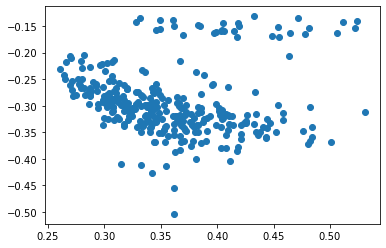

In [24]:
import matplotlib.pyplot as plt

final_embs_batched = exp_log.embeddings[-1]
final_embs = [] # i.e. unbatched
for (node_emb, edge_emb, graph_emb, batch) in final_embs_batched:
    ts_node_emb_batch = to_dense_batch(node_emb, batch.x_ts_batch)[0] # just append tensors, not true/false values
    for mol_id, ts_node_emb in enumerate(ts_node_emb_batch):
        final_embs.append((ts_node_emb, graph_emb[mol_id]))

graph_embs = [graph_emb.detach().numpy() for (_, graph_emb) in final_embs]

# graph_embs = torch.cat(graph_embs) = shape 640

# node_embs = torch.cat(node_embs, dim = 0)

# xs, ys = zip(*TSNE().fit_transform(node_embs.detach().numpy()))
# plt.scatter(xs, ys)
# node_embs.shape

plt.scatter(*zip(*graph_embs))
# plt.scatter(graph_embs)

Preparing data...
Data prepared.
Preparing model...
Model prepared.
Starting TS interpolation experiment...
===== Training epoch 001 complete with loss: 9.7701 ====
===== Training epoch 002 complete with loss: 4.9095 ====
===== Training epoch 003 complete with loss: 4.6381 ====
===== Training epoch 004 complete with loss: 4.4627 ====

Completed experiment, printing results as TSNE plot...
1


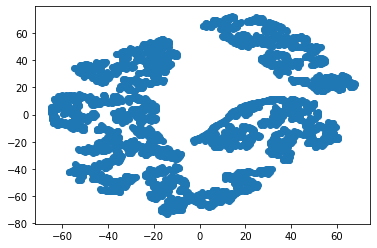

In [1]:
%run -i experiments/model_learning/what_is_learned